In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pylab
from pylab import xticks
import matplotlib.ticker as mtick
from matplotlib.ticker import MaxNLocator as mxn
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\salom\OneDrive\Documentos\11-2025 Instacart Basket Analysis'

In [3]:
# Import last pkl dataframe

ords_prods = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_aggregated.pkl'))

### Bar charts

<Axes: xlabel='orders_day_of_week'>

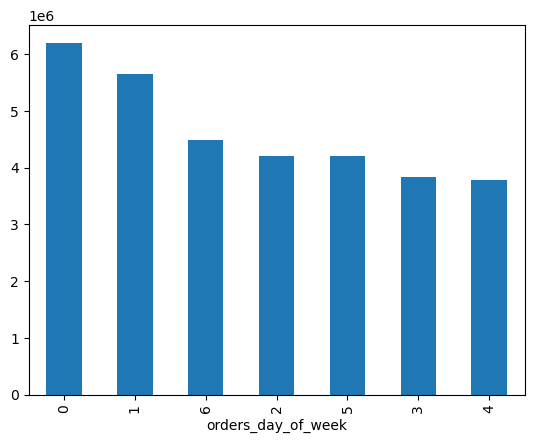

In [4]:
ords_prods['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

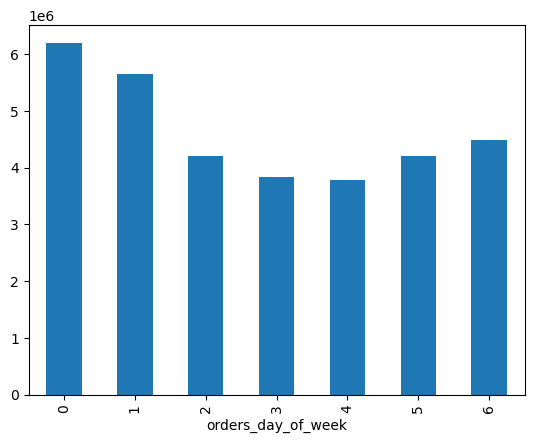

In [5]:
# Sort bars according to index

ords_prods['orders_day_of_week'].value_counts().sort_index().plot.bar()

<Axes: xlabel='orders_day_of_week'>

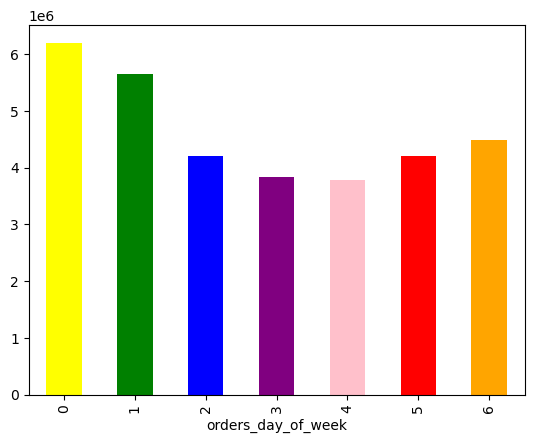

In [6]:
# Add colors

ords_prods['orders_day_of_week'].value_counts().sort_index().plot.bar(color=['yellow', 'green', 'blue', 'purple', 'pink', 'red', 'orange'])

In [5]:
import math

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle


def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * ncols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * ncols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

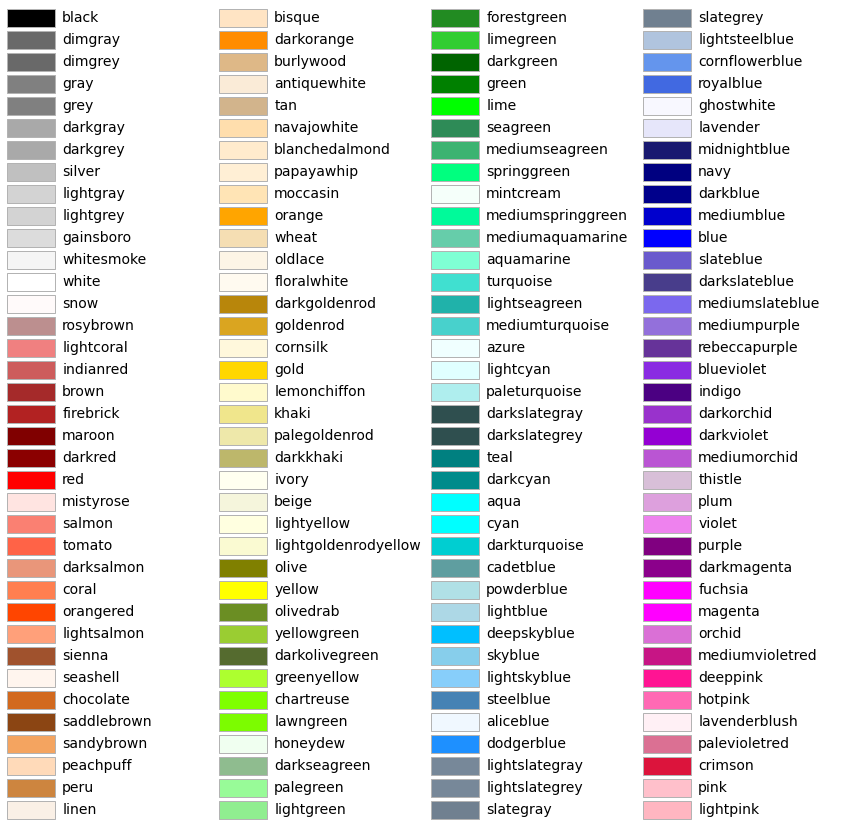

In [6]:
plot_colortable(mcolors.CSS4_COLORS)
plt.show()

<Axes: xlabel='orders_day_of_week'>

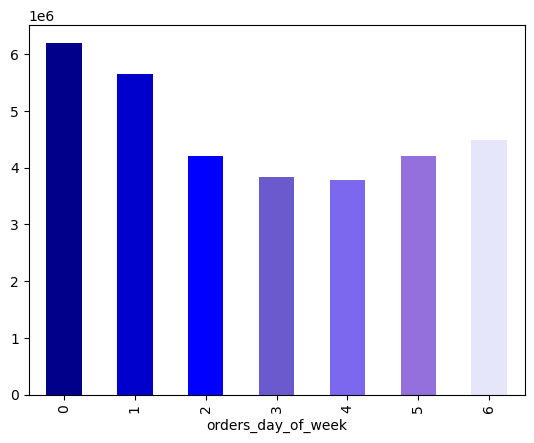

In [9]:
# Add CSS colors

ords_prods['orders_day_of_week'].value_counts().sort_index().plot.bar(color=['darkblue', 'mediumblue', 'blue', 'slateblue', 'mediumslateblue', 'mediumpurple', 'lavender'])

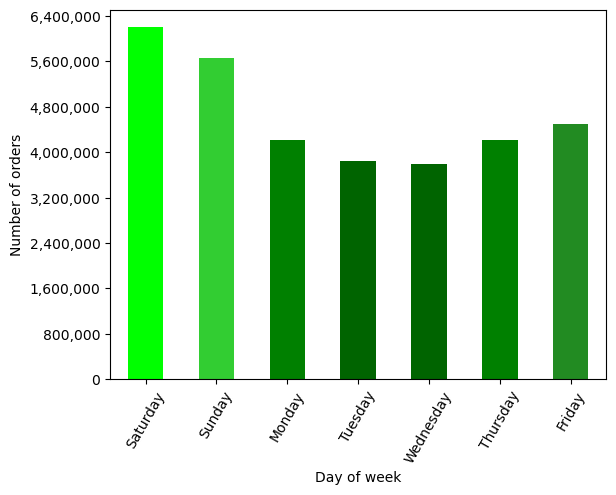

In [7]:
bar = ords_prods['orders_day_of_week'].value_counts().sort_index().plot.bar(
      color=['lime', 'limegreen', 'green', 'darkgreen', 'darkgreen', 'green', 'forestgreen'])

bar.set_xlabel('Day of week')
bar.set_ylabel('Number of orders')

# Disable scientific notation on y-axis
bar.ticklabel_format(style='plain', axis='y')

# Force integer y-axis ticks
bar.yaxis.set_major_locator(mxn(integer=True))
bar.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6],
           labels=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
          rotation=60)
plt.show()

In [8]:
#Save chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'), bbox_inches='tight')

### Histograms

<Axes: ylabel='Frequency'>

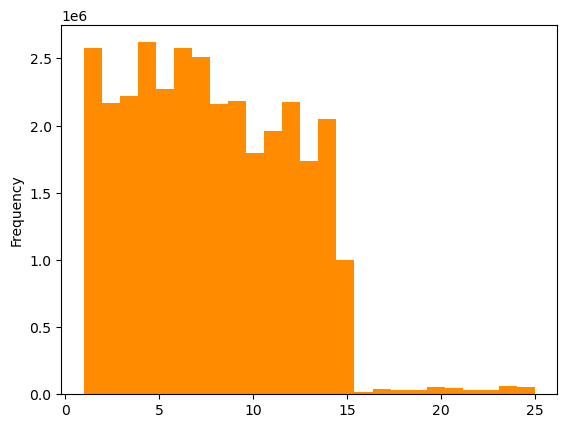

In [12]:
ords_prods['prices'].plot.hist(bins = 25, color = 'darkorange')

#### Note: The 14,900.00 and 99,999.00 values had already been cleaned in Ex 4.5 and imputed using the median.

<Axes: ylabel='Frequency'>

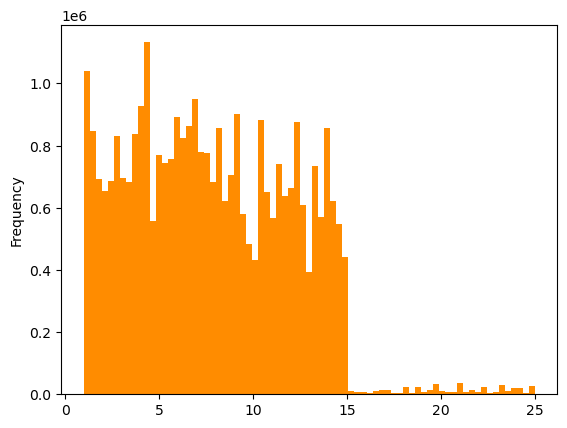

In [13]:
#Increase granularity

ords_prods['prices'].plot.hist(bins = 75, color = 'darkorange')

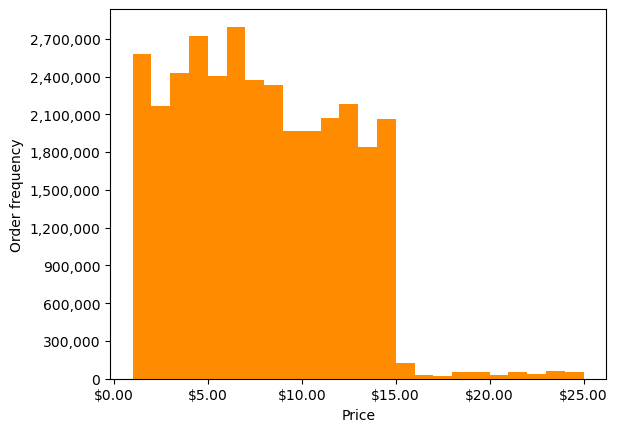

In [12]:
hist = ords_prods['prices'].plot.hist(bins = 24, color = 'darkorange')
hist.set_xlabel('Price')
hist.set_ylabel('Order frequency')
# Disable scientific notation on y-axis
hist.ticklabel_format(style='plain', axis='y')

# Force integer y-axis ticks
hist.yaxis.set_major_locator(mxn(integer=True))
hist.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
hist.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:.2f}'))

In [13]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'), bbox_inches='tight')

### Scatterplots

<Axes: xlabel='prices', ylabel='prices'>

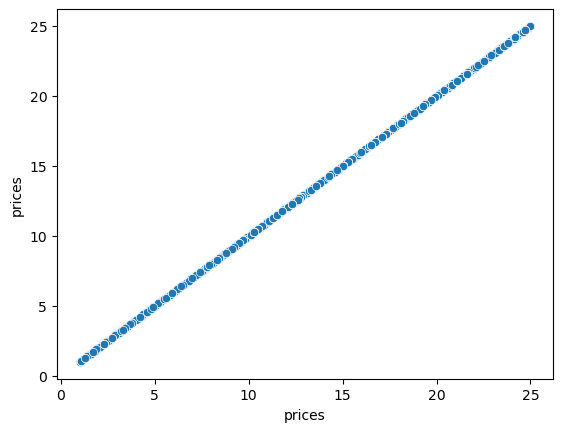

In [16]:
sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods)

### Line charts

#### Sampling data

In [14]:
# Create a list holding True/False values to the test np.random.rand <= 0.7

np.random.seed(4)
dev = np.random.rand(len(ords_prods)) <= 0.7

In [15]:
# Store 70% of the sample in the dataframe big

big = ords_prods[dev]

In [16]:
# Store 30% of the sample in the dataframe big

small = ords_prods[~dev]

In [ ]:
# Check samples

len(ords_prods)

In [ ]:
len(big)+len(small)

In [17]:
# Reducing your samples to only the columns necessary for the chart, “prices” and “orders_day_of_week.”

df_2 = small[['orders_day_of_week','prices']]

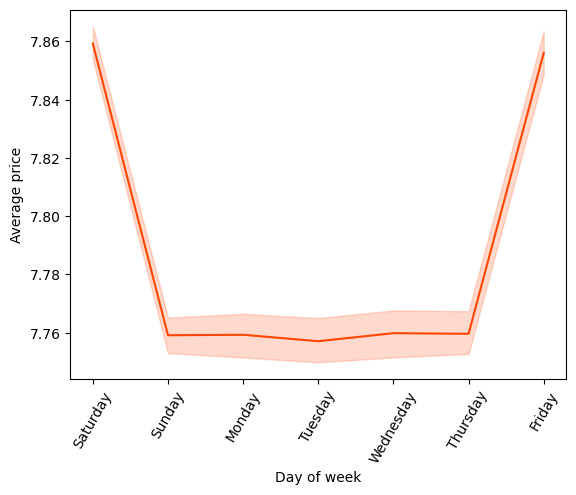

In [18]:
# Create line chart

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices', color='orangered')
line.set_xlabel('Day of week')
line.set_ylabel('Average price')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6],
           labels=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
          rotation=60)
plt.show()

In [19]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_dow_prices.png'), bbox_inches='tight')

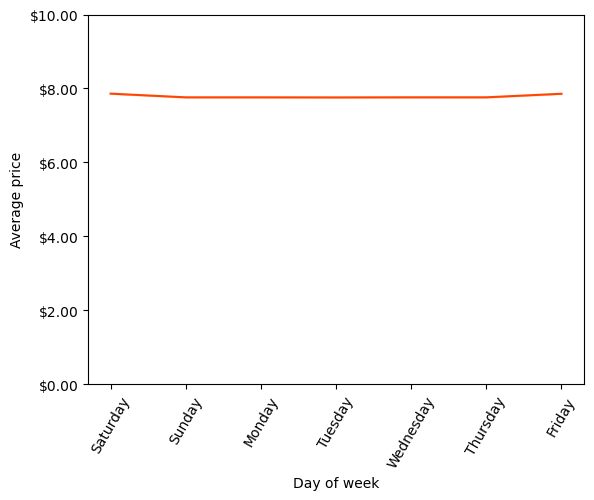

In [21]:
# Create line chart with baseline in 0

line2 = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices', color='orangered')
line2.set_xlabel('Day of week')
line2.set_ylabel('Average price')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6],
           labels=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
          rotation=60)
line2.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:.2f}'))
plt.ylim(0,10)
plt.show()

In [22]:
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_dow_prices2.png'), bbox_inches='tight')

### You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

Text(0.5, 0, 'Hour of day')

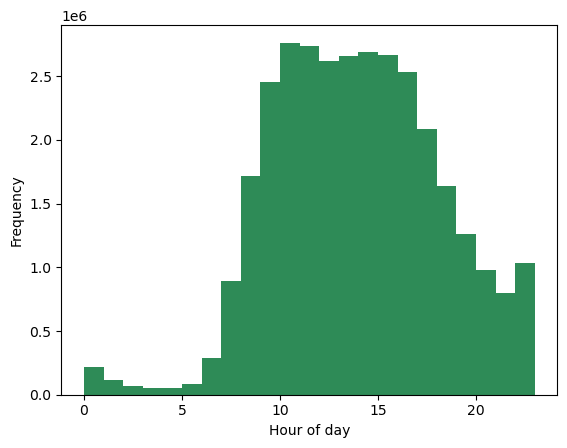

In [104]:
ords_prods['order_hour_of_day'].plot.hist(bins = 23, color = 'seagreen').set_xlabel('Hour of day')

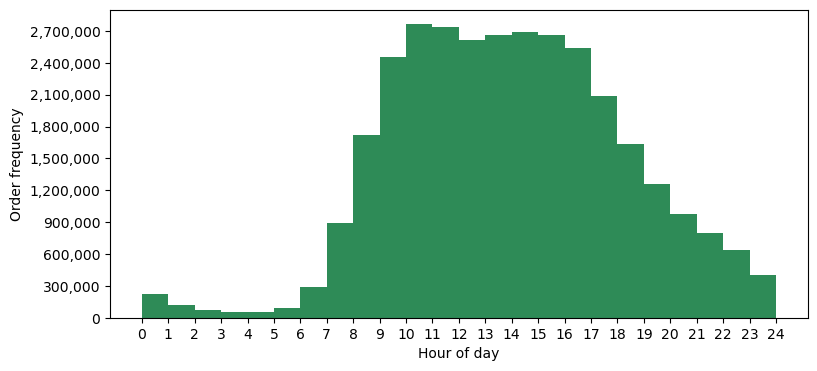

In [23]:
hist_hour = ords_prods['order_hour_of_day'].plot.hist(
    figsize=(9, 4),
    histtype='stepfilled',
    bins=range(0, 25),
    color='seagreen'
)

hist_hour.set_xlabel('Hour of day')
hist_hour.set_ylabel('Order frequency')

# Disable scientific notation on y-axis
hist_hour.ticklabel_format(style='plain', axis='y')

# Force integer y-axis ticks
hist_hour.yaxis.set_major_locator(mxn(integer=True))
hist_hour.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.xticks(range(0, 25))
plt.show()

In [24]:
hist_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_order_hour_of_day.png'), bbox_inches='tight')

#### This histogram confirms the insights obtained in Exercise 4.7 when defining the busiest hours of days, between 10h and 16 hours. Before 10h and after 16h, there are fewer or average orders.

### The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

In [23]:
ords_prods['loyalty_flag'].describe()

count             32404859
unique                   3
top       Regular customer
freq              15876776
Name: loyalty_flag, dtype: object

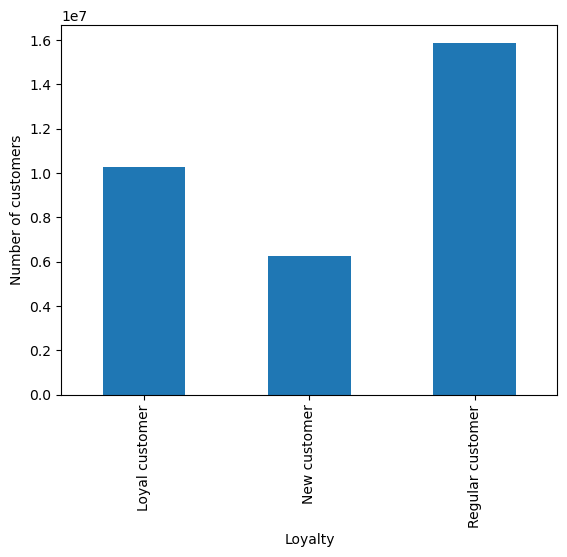

In [166]:
bar_loyalty = ords_prods['loyalty_flag'].value_counts().sort_index().plot.bar(xlabel = 'Loyalty', ylabel= 'Number of customers')

(array([0, 1, 2]),
 [Text(0, 0, 'Regular customer'),
  Text(1, 0, 'Loyal customer'),
  Text(2, 0, 'New customer')])

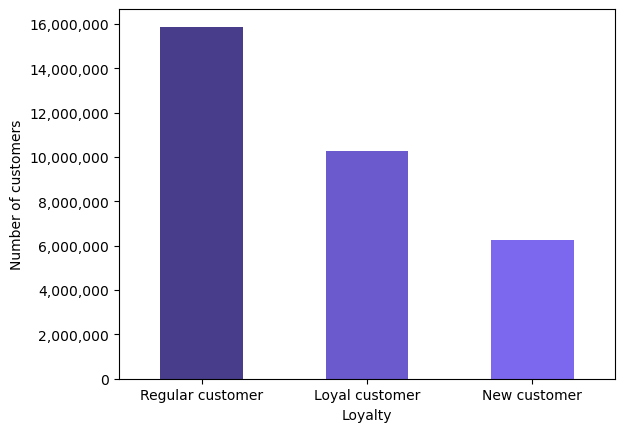

In [25]:
bar_loyalty = ords_prods['loyalty_flag'].value_counts().plot.bar(
    xlabel='Loyalty',
    ylabel='Number of customers',
    color=['darkslateblue', 'slateblue', 'mediumslateblue']
)

# Plain style (no scientific notation) + thousands separator, 0 decimals
bar_loyalty.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=0)

In [26]:
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_customer_loyalty.png'), bbox_inches='tight')

(array([0, 1, 2]),
 [Text(0, 0, 'Frequent customer'),
  Text(1, 0, 'Regular customer'),
  Text(2, 0, 'Non-frequent customer')])

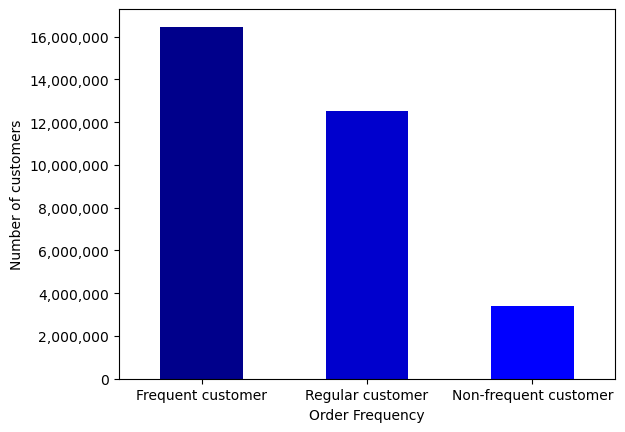

In [11]:
bar_frequency = ords_prods['frequency_flag'].value_counts().plot.bar(
    xlabel='Order Frequency',
    ylabel='Number of customers',
    color=['darkblue', 'mediumblue', 'blue']
)

# Plain style (no scientific notation) + thousands separator, 0 decimals
bar_frequency.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=0)

In [12]:
bar_frequency.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_customer_frequency.png'), bbox_inches='tight')

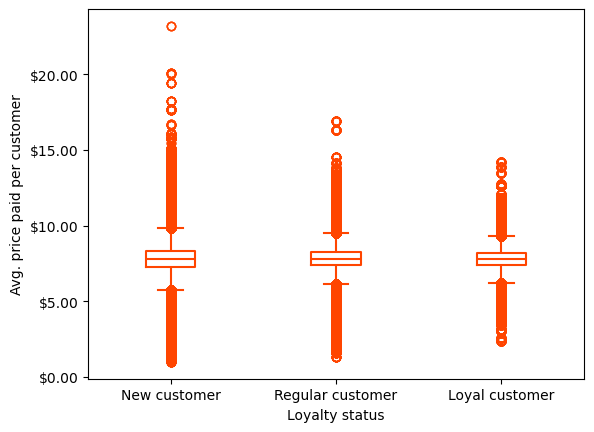

In [18]:
# Create a boxplot of 'avg_price_by_user' per 'loyalty'

bxplt_spend_loyalty = sns.boxplot(
    data=ords_prods,
    x='loyalty_flag',
    y='avg_price_by_user',
    fill=False,
    width=.3,
    color='orangered'
)
bxplt_spend_loyalty.set_xlabel('Loyalty status')
bxplt_spend_loyalty.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:.2f}'))
bxplt_spend_loyalty.set_ylabel('Avg. price paid per customer')
plt.show()

In [19]:
bxplt_spend_loyalty.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'bxplt_spend_loyalty.png')), bbox_inches='tight')

In [5]:
# Print all column names as an Index object

print(ords_prods.columns)

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price_by_user', 'spending_flag', 'avg_days_prior_order',
       'frequency_flag'],
      dtype='object')


In [20]:
loyalty = ords_prods.groupby('loyalty_flag').agg({'order_number': [ 'min', 'mean','max'], 'orders_day_of_week': [ 'min', 'mean','max'], 'order_hour_of_day': [ 'min', 'mean','max'], 'days_since_prior_order': [ 'min', 'mean','max'], 'prices': [ 'min', 'mean','max']})
loyalty.to_clipboard()
loyalty

order_number                orders_day_of_week                \
                          min       mean max                min      mean max   
loyalty_flag                                                                    
Loyal customer              1  32.641196  99                  0  2.791642   6   
New customer                1   3.807044  10                  0  2.697449   6   
Regular customer            1  12.347452  40                  0  2.720970   6   

                 order_hour_of_day                days_since_prior_order  \
                               min       mean max                    min   
loyalty_flag                                                               
Loyal customer                   0  13.188346  23                    0.0   
New customer                     0  13.673824  23                    0.0   
Regular customer                 0  13.480738  23                    0.0   

                                  prices                  
                       mean   max    min      mean   max  
loyalty_flag                                              
Loyal customer     6.026656  30.0    1.0  7.773487  25.0  
New customer      17.976936  30.0    1.0  7.801077  25.0  
Regular customer  12.155135  30.0    1.0  7.798145  25.0

In [14]:
loyalty_prods = ords_prods.groupby('loyalty_flag')['product_name'].agg(pd.Series.mode)
loyalty_prods.to_clipboard()
loyalty_prods

loyalty_flag
Loyal customer      Banana
New customer        Banana
Regular customer    Banana
Name: product_name, dtype: object

### Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. 

In [27]:
# Use an accurate sample for your line chart

df_3 = small[['order_hour_of_day','prices']]

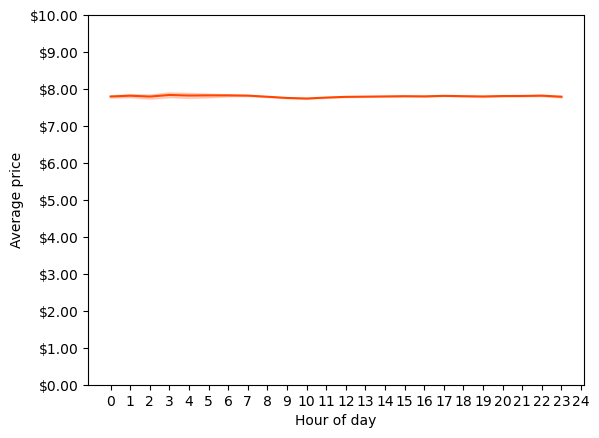

In [29]:
# Create line chart

line_hour = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices', color='orangered')
line_hour.set_xlabel('Hour of day')
line_hour.set_ylabel('Average price')
line_hour.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:.2f}'))
plt.xticks(range(0, 25))
plt.yticks(range(0,11))
plt.show()

In [31]:
line_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_price_hour2.png'), bbox_inches='tight')

## Import customers combined dataframe for additional analysis

In [36]:
# Import customers combined pkl dataframe

ords_prods_custs = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers.pkl'))

In [37]:
ords_prods_custs.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,avg_price_by_user,spending_flag,avg_days_prior_order,frequency_flag,gender,state,age,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,6.367797,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,6.367797,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,6.367797,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,3,married,40423
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,6.367797,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,3,married,40423
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,6.367797,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,3,married,40423


### Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents.

In [38]:
# Create a list holding True/False values to the test np.random.rand <= 0.7

np.random.seed(4)
dev2 = np.random.rand(len(ords_prods_custs)) <= 0.7

In [39]:
# Store 70% of the sample in the dataframe big

big2 = ords_prods_custs[dev2]

In [40]:
# Store 30% of the sample in the dataframe big

small2 = ords_prods_custs[~dev2]

In [41]:
# Check samples

len(ords_prods_custs)

32404859

In [42]:
len(big2)+len(small2)

32404859

In [43]:
# Reducing samples to only the columns necessary for the chart.

df_family = small2[['age','n_dependants']]

Text(0, 0.5, 'Number of dependants')

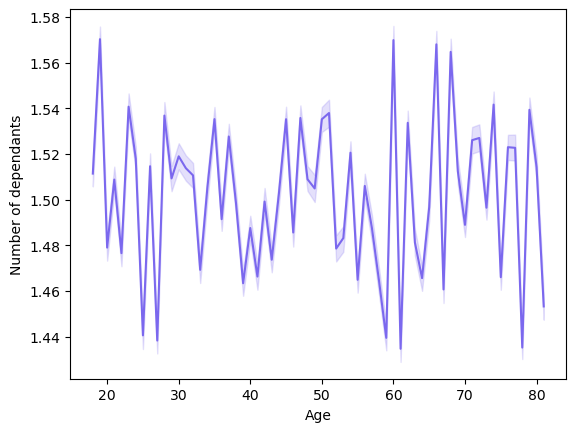

In [44]:
# Create line chart

line_family = sns.lineplot(data = df_family, x = 'age',y = 'n_dependants', color='mediumslateblue')
line_family.set_xlabel('Age')
line_family.set_ylabel('Number of dependants')

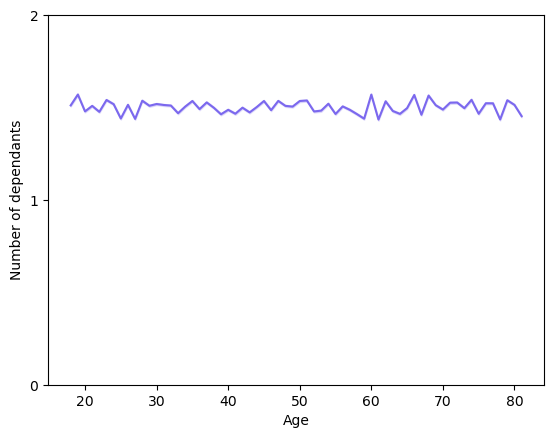

In [50]:
# Create line chart

line_family2 = sns.lineplot(data = df_family, x = 'age',y = 'n_dependants', color='mediumslateblue')
line_family2.set_xlabel('Age')
line_family2.set_ylabel('Number of dependants')
line_family2.yaxis.set_major_locator(mxn(integer=True))
line_family2.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0f}'))
plt.yticks(range(0, 3))
plt.show()

#### The line chart shows that in average all age groups have roughly the same number of dependants. A different type of visualization such as a scatterplot or a histogram could provide more insights into this correlation or distribution.

In [48]:
line_family.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_family_age.png'), bbox_inches='tight')

In [51]:
line_family2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line2_family_age.png'), bbox_inches='tight')

### You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

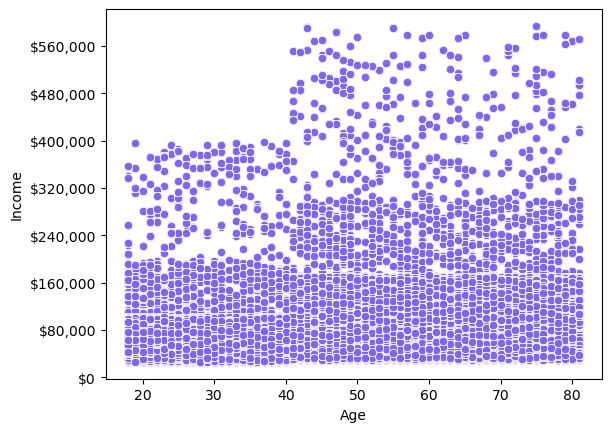

In [52]:
age_scatt = sns.scatterplot(x = 'age', y = 'income', data = small2, color='mediumslateblue')
age_scatt.set_xlabel('Age')
age_scatt.set_ylabel('Income')
age_scatt.yaxis.set_major_locator(mxn(integer=True))
age_scatt.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

#### The scatterplot clearly shows that there is a connection between age and spending power (income). Most customer under 40 years have an income below $$200,000, with outliers having a spending power of up to $400,000. Customers older than 40 years have a considerably higher spending power, and, as shown by the previous line chart, they don't necessarily have more dependants.

In [53]:
age_scatt.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatt_age_income.png'), bbox_inches='tight')